## Week 3 Astra Data

In [3]:
%pip install scipy

   ---------------------------------------- 0.0/44.7 MB ? eta -:--:--
    --------------------------------------- 1.0/44.7 MB 4.6 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/44.7 MB 5.4 MB/s eta 0:00:08
   --- ------------------------------------ 3.9/44.7 MB 6.2 MB/s eta 0:00:07
   ---- ----------------------------------- 5.5/44.7 MB 6.6 MB/s eta 0:00:06
   ------ --------------------------------- 7.3/44.7 MB 7.0 MB/s eta 0:00:06
   ------- -------------------------------- 8.9/44.7 MB 7.1 MB/s eta 0:00:06
   --------- ------------------------------ 10.7/44.7 MB 7.3 MB/s eta 0:00:05
   ----------- ---------------------------- 12.3/44.7 MB 7.4 MB/s eta 0:00:05
   ------------ --------------------------- 13.6/44.7 MB 7.1 MB/s eta 0:00:05
   ------------- -------------------------- 14.9/44.7 MB 7.2 MB/s eta 0:00:05
   -------------- ------------------------- 16.3/44.7 MB 7.1 MB/s eta 0:00:05
   --------------- ------------------------ 17.0/44.7 MB 6.7 MB/s eta 0:00:05


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
data = pd.read_csv('InstLayout 588_2024-08-15 16-23 - BSA (37 C) 2gL 50uL (LC - A-RC 10 kDa-Water) Vcf100 Vx400g Vf400.csv')
time = data['time (min)']
signal_intensity = data['raw light scattering data: detector voltage  (V) detector 11']
absorbance_UV1 = data['UV absorbance data: absorbance  (AU) channel 1']
absorbance_UV2 = data['UV absorbance data: absorbance  (AU) channel 2']


In [2]:
plt.figure()
plt.plot(time,signal_intensity)
plt.xlabel('Time (min)')
plt.ylabel('detector voltage (V)')
plt.title('V vs Time')
plt.show()

NameError: name 'time' is not defined

<Figure size 640x480 with 0 Axes>

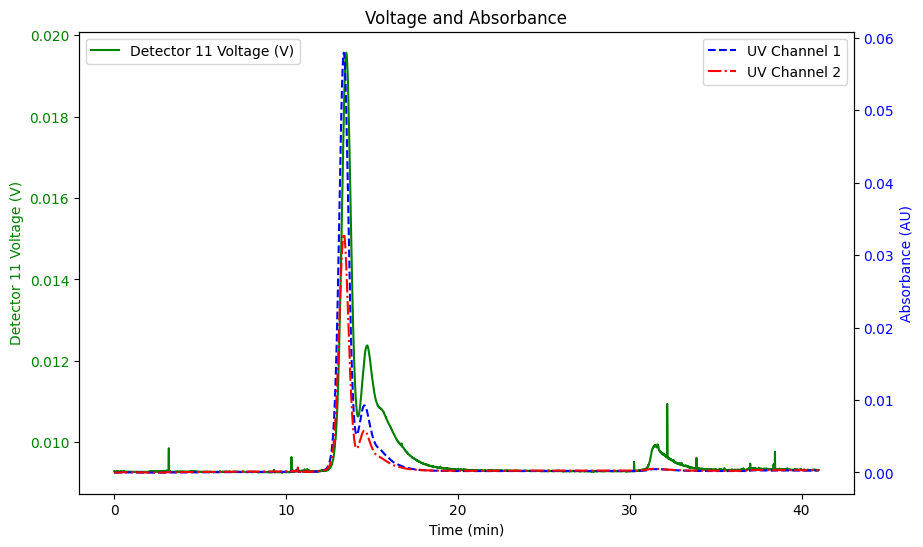

In [4]:
# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (y1) on the first y-axis
ax1.plot(time, signal_intensity, 'g-', label='Detector 11 Voltage (V)')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Detector 11 Voltage (V)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second and third lines on the second y-axis
ax2.plot(time, absorbance_UV1, 'b--', label='UV Channel 1')
ax2.plot(time, absorbance_UV2, 'r-.', label='UV Channel 2')
ax2.set_ylabel('Absorbance (AU)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Voltage and Absorbance')
plt.show()

# Despiking Algorithms

## Rolling Average / Mean
Smooths the data by averaging a window of values around each point. This method can reduce the impact of spikes but may also smooth out important data variations.

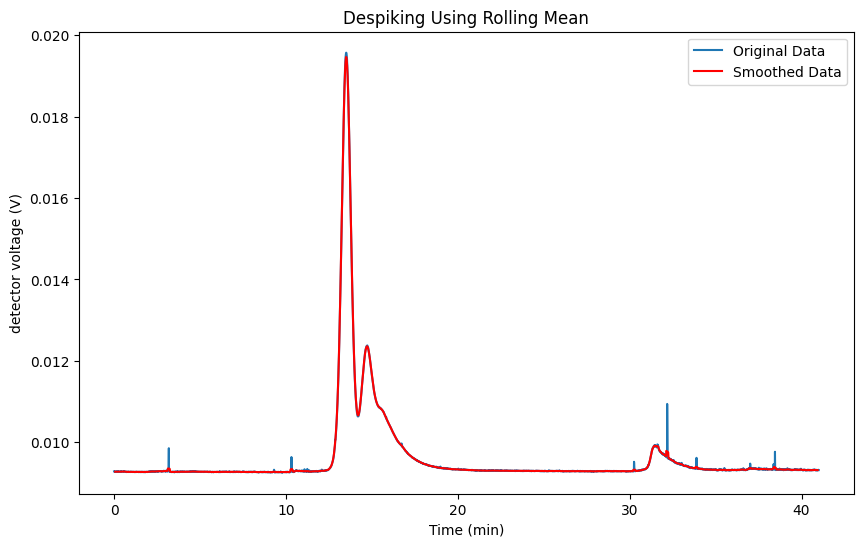

In [43]:
# Window refers to a rolling window that goes over the data and averages out the values within that window.
window_size = 15
smoothed_signalIntesity = signal_intensity.rolling(window=window_size, center=True).mean()

fig1 = plt.figure(figsize=(10, 6))
plt.plot(time, signal_intensity, label='Original Data')
plt.plot(time, smoothed_signalIntesity, label='Smoothed Data', color='red')
plt.title('Despiking Using Rolling Mean')
plt.xlabel('Time (min)')
plt.ylabel('detector voltage (V)')
plt.legend()
plt.show()

## Despiking Using Z-Score
A z-score / Standard Score describes a value’s relationship to the mean of a group of values. It indicates how many standard deviations a data point is from the mean of the dataset.

The formula for calculating the z-score of a value $x$ is:
$$z=\frac{x-\mu}{\sigma}$$

* $x$ is the value being evaluated.
* $\mu$ is the mean of the dataset.
* $\sigma$ is the standard deviation of the dataset.

Interpretation:

- A z-score of 0 means the data point is exactly at the mean.
- A positive z-score indicates the data point is above the mean.
- A negative z-score indicates the data point is below the mean.
- For example, a z-score of 2 means the data point is 2 standard deviations above the mean, while a z-score of -1.5 means it is 1.5 standard deviations below the mean.

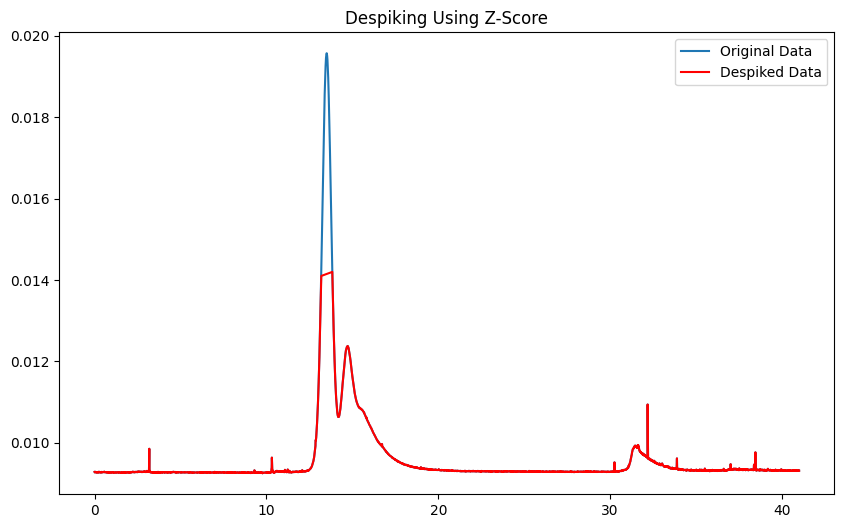

In [20]:
# Calculate the Z-score of the data
z_scores = (signal_intensity - signal_intensity.mean()) / signal_intensity.std()

# Threshold for identifying spikes
threshold = 4  # Choose an appropriate threshold

# Replace spikes with NaN or apply interpolation
signal_intensityZ = signal_intensity.copy()
signal_intensityZ[np.abs(z_scores) > threshold] = np.nan
signal_intensityZ = signal_intensityZ.interpolate()  # Interpolate to fill NaN values

# Plot the original and despiked data
fig2 = plt.figure(figsize=(10, 6))
plt.plot(time, signal_intensity, label='Original Data')
plt.plot(time, signal_intensityZ,label='Despiked Data', color='red')
plt.title('Despiking Using Z-Score')
plt.legend()
plt.show()

## Using Median Filter
A median filter can be effective for removing spikes while preserving the overall trend of the data.

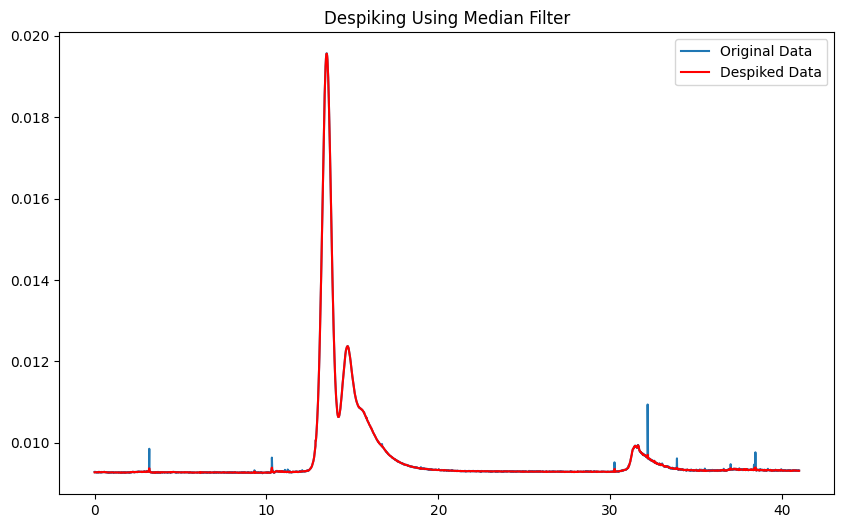

In [23]:
# Apply a median filter to smooth the data and reduce spikes - same as window just needed a new name
kernel_size = 5  # Choose an appropriate kernel size
median_signalIntensity = medfilt(signal_intensity,kernel_size)#medfilt(signal_intensity, kernel_size)

# Plot the original and despiked data
fig3 = plt.figure(figsize=(10, 6))
plt.plot(time,signal_intensity, label='Original Data')
plt.plot(time,median_signalIntensity, label='Despiked Data', color='red')
plt.title('Despiking Using Median Filter')
plt.legend()
plt.show()

### Comparison of all 3

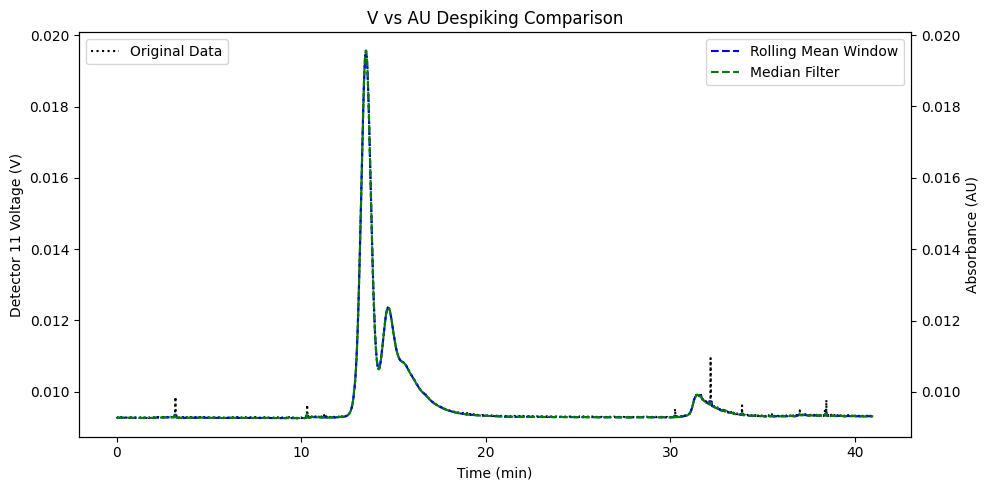

In [44]:
#Comparison
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(time,signal_intensity,'k:', label='Original Data')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Detector 11 Voltage (V)')


ax2 = ax1.twinx()
ax2.plot(time,smoothed_signalIntesity,'b--',label='Rolling Mean Window')
#ax2.plot(time,signal_intensityZ,'r--',label='Z-Score')
ax2.plot(time,median_signalIntensity,'g--', label='Median Filter')
ax2.set_ylabel('Absorbance (AU)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('V vs AU Despiking Comparison')
plt.tight_layout()
plt.show()

It seems like, Median method is best suited.